# Stochastic Gradient Descent


**Advantages:**
- Capable of handling very large datasets

## Imports

In [1]:
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

import utils

## Base Line

In [2]:
# Load data
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
X_train, X_test, y_train, y_test = utils.splitTrain(train_input, train_output)

# Create model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# Prediciton
y_pred = sgd_clf.predict(X_test)

# Evaluation
metrics.accuracy_score(y_test, y_pred)

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9911154031868662

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


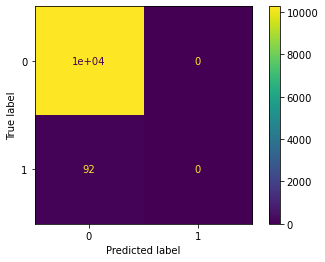

In [3]:
# Compute confusion matrix
M = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = M.ravel() # True/False negative/positive

# Plot confusion matrix
plot_confusion_matrix(sgd_clf, X_test, y_test)
plt.show()

As always, it is overfitting the data because defective individuals are under represented in population...

## Balanced Classes

### Removing Individuals

Some randomly selected individuals from the valid class (the one which is over represented in the dataset) are removed.

In [4]:
# Load data and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
train_input, train_output = utils.balanceClassesByRemoving(train_input, train_output)
X_train, X_test, y_train, y_test = utils.splitTrain(train_input, train_output)

# Create model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# Prediciton
y_pred = sgd_clf.predict(X_test)

# Evaluation
metrics.accuracy_score(y_test, y_pred)

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5136612021857924

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


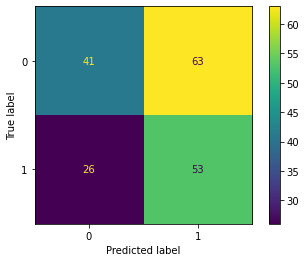

In [5]:
# Plot confusion matrix
plot_confusion_matrix(sgd_clf, X_test, y_test)
plt.show()

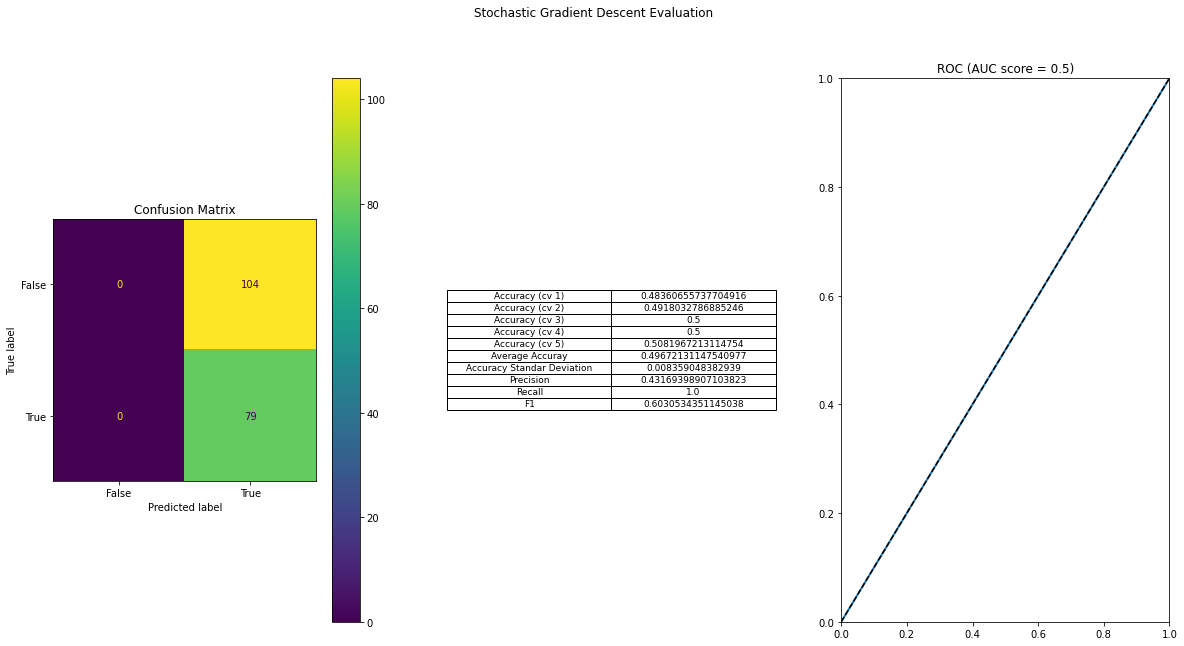

In [6]:
# Load data
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
train_input, train_output = utils.balanceClassesByRemoving(train_input, train_output)

# Create model
clf = SGDClassifier(random_state=42)

# Evaluation
utils.modelEvaluation(clf, train_input, train_output, model_name="Stochastic Gradient Descent", fig_name="sgd_d")

The overall accuracy of the classifier decreased but it is now actually trying to class individuals! However we removed a lot of data...

### Duplicating Individuals

In [7]:
# # Load date and balance classes
# train_input, train_output = utils.loadTrainingData("data/train_inputs_balanced.csv", "data/train_output_balanced.csv", remove_id=True, remove_capuchon_insertion=True)
# # train_input, train_output = utils.balanceClassesByDuplicating(train_input, train_output, modify=False)
# X_train, X_test, y_train, y_test = utils.splitTrain(train_input, train_output)

# # Create model
# sgd_clf = SGDClassifier(random_state=42)
# sgd_clf.fit(X_train, y_train)

# # Prediciton
# y_pred = sgd_clf.predict(X_test)

# # Evaluation
# metrics.accuracy_score(y_test, y_pred)

In [8]:
# plot_confusion_matrix(sgd_clf, X_test, y_test)
# plt.show()

Better accuracy than removing, but still not good...

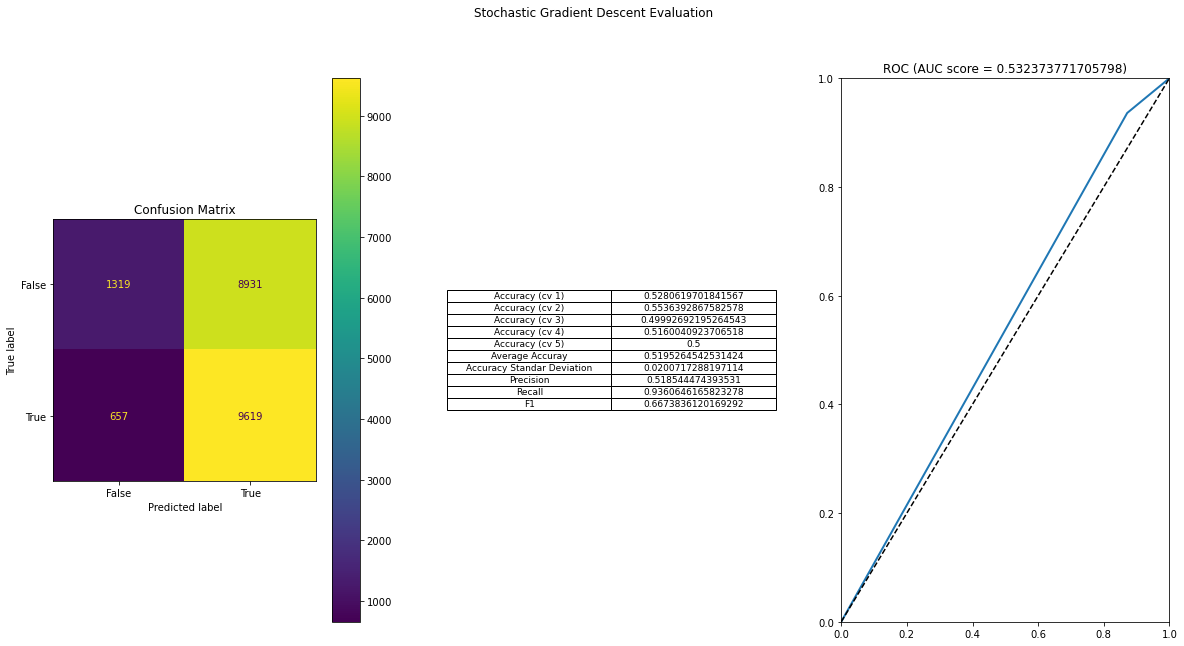

In [9]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData("data/train_inputs_balanced.csv", "data/train_output_balanced.csv", remove_id=True, remove_capuchon_insertion=True)
# train_input, train_output = utils.balanceClassesByDuplicating(train_input, train_output, modify=False)

# Create model
clf = SGDClassifier(random_state=42)

# Evaluation
utils.modelEvaluation(clf, train_input, train_output, model_name="Stochastic Gradient Descent", fig_name="sgd_d")

## Evaluation

### Cross Validation

In [10]:
# Create model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train["result"])

# Prediction
y_pred = cross_val_predict(sgd_clf, X_train, y_train["result"], cv=3)

# Evaluation
cross_val_score(sgd_clf, X_train, y_train["result"], cv=3, scoring="accuracy")

array([0.55244755, 0.57042254, 0.54929577])

### Confusion Matrix

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


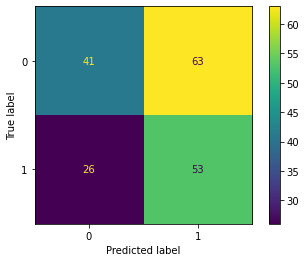

In [11]:
# Plot confusion matrix
plot_confusion_matrix(sgd_clf, X_test, y_test)
plt.show()

### Precision and Recall

In [12]:
# Using confusion matrix
M = confusion_matrix(y_train, y_pred)
tn, fp, fn, tp = M.ravel() # True/False negative/positive
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 / ((1/precision) + (1/recall))

# Using sklearn functions
precision = precision_score(y_train, y_pred)
recall_score(y_train, y_pred)
f1_score(y_train, y_pred)

print("Precision =", precision, "\nRecall =", recall, "\nF1 =", f1)

Precision = 0.6045197740112994 
Recall = 0.47345132743362833 
F1 = 0.531017369727047


- Precision: When the classifier claims the individual is defective, it is correct *precision*% of the time
- Recall: The classifier detects *recall*% of the defective individuals

- F1 score: harmonic mean of precision and recall. Gets higher if **both** recall and precision are high. Not always the best score as in some application precision is more important than recall or vice versa.

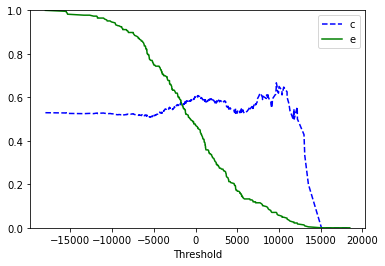

In [13]:
def plotPrecisionRecallVsThreshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend("center left")
    plt.ylim([0, 1])

y_scores = cross_val_predict(sgd_clf, X_train, y_train["result"], cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plotPrecisionRecallVsThreshold(precisions, recalls, thresholds)
plt.show()

In [14]:
y_scores

array([-2.85539705e+03, -1.77040231e+03,  8.53661717e+02, -1.22541792e+03,
       -2.25332701e+03,  9.25418640e+02, -6.15077530e+03, -3.15668479e+02,
        2.87472669e+02, -1.90956699e+03, -4.99918152e+03, -5.82751558e+03,
       -5.54945718e+03, -5.16516696e+03, -6.73404442e+03, -1.06432483e+04,
       -6.14025186e+03,  1.49542663e+03, -2.21073608e+02, -1.33790585e+04,
       -2.42514292e+03,  2.29364807e+03, -7.79818356e+03, -4.09904366e+03,
       -3.14256874e+03, -6.49149939e+03,  2.73285000e+03, -8.98090306e+03,
       -5.83100167e+03, -3.12565305e+03, -3.18869650e+03, -6.02607507e+03,
       -1.18445354e+04, -1.74436408e+03,  7.45129705e+02, -1.10259464e+04,
       -6.12485213e+03,  7.15580582e+02, -2.20192031e+03, -4.00855903e+03,
        3.67053538e+03, -2.15875184e+03, -4.41907518e+03, -4.67024033e+03,
       -8.72841763e+03,  2.58329369e+03, -1.16374035e+03, -7.38338352e+03,
       -8.51136320e+02, -4.04780401e+03,  3.05794839e+02, -5.94832559e+03,
       -8.85281959e+03,  

Choose the threshold value that gives the best precision/recall tradeoff for the classification.

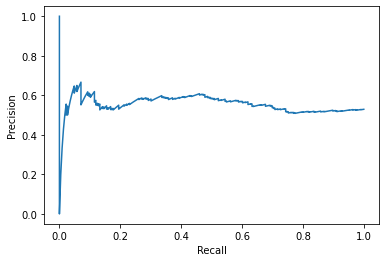

In [15]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

### ROC Curve

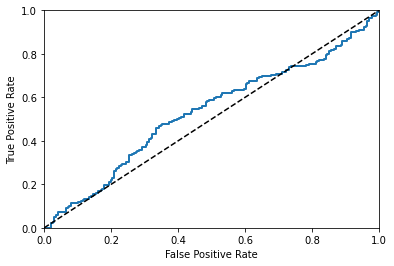

In [16]:
def plotROC(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plotROC(fpr, tpr)
plt.show()

In [17]:
roc_auc_score(y_train, y_scores)

0.5296306080218377

ROC AUC Score (1: perfect classifier | 0: random classifier)

In [4]:
a = 1
b = 2
c = 3
d = 4
import numpy as np
average_confusion_matrix = np.array([[a, b],[c, d]])
average_confusion_matrix
# np.ravel(average_confusion_matrix)


array([1, 2, 3, 4])